In [4]:
pip install yfinance


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#setup
#code
ticker = yf.Ticker('SBUX') #import data
aapl_df = ticker.history(period="5y") #get data from 5 year period in dataframe
aapl_df.drop(['High','Close','Volume','Dividends','Stock Splits'], axis=1, inplace=True) #only have two columns, not seven
open = np.empty(shape = (1259), dtype = float)
close = np.empty(shape = (1259), dtype = float)

open=aapl_df[['Open']].to_numpy()


In [5]:
X = np.zeros((1260,3))
Y = [0]*1260

for i in range(1250):
  X[i] = [open[i][0], open[i+1][0], open[i+2][0]]
  Y[i] = open[i+3][0]
print(X[0],Y[0])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

print(X_train[0],Y_train[0])

linearM = linear_model.LinearRegression()

linearM.fit(X_train, Y_train)

# Make predictions using the testing set
linearPred = linearM.predict(X_test)

# The coefficients
print("Coefficients: \n", linearM.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, linearPred))
# The coefficient of determination: 1 is perfect prediction


mRegr = MLPRegressor(random_state=1, max_iter=20000).fit(X_train, Y_train)
mRegrPred = mRegr.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, mRegrPred))

decisionTree = DecisionTreeRegressor(max_depth=50)
decisionTree.fit(X_train,Y_train)
decisionTreePred = decisionTree.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, decisionTreePred))

randomForest = RandomForestRegressor(max_depth=50, random_state=0)
randomForest.fit(X_train, Y_train)
randomForestPred = randomForest.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, randomForestPred))

#randomForestPred2 =randomForest.predict(X_train)
#print("Mean squared error: %.2f" % mean_squared_error(Y_train, randomForestPred2))


[78.82511809 77.97417672 77.75918605] 74.22102737464712
[67.45586558 67.82623959 67.06696589] 65.81693317158339
Coefficients: 
 [ 0.03746197 -0.04851096  1.00466704]
Mean squared error: 2.53
Mean squared error: 2.75
Mean squared error: 6.67
Mean squared error: 3.61


In [6]:
money = 10000
stocks = 0
prediction = linearM.predict(X)
for i in range(1240):
  if prediction[i+1] > Y[i] and money >= Y[i]:
    stocks = stocks + 1
    money = money - Y[i]
  elif prediction[i+1] < Y[i] and stocks > 0:
    stocks = stocks - 1
    money = money + Y[i]
money = money + stocks * Y[1240]
stocks = 0
print(money,stocks)




15616.062376497359 0


In [7]:
money = 10000
stocks = 0
prediction = linearM.predict(X)
for i in range(1240):
  if prediction[i+1] > Y[i] and money >= Y[i] * 2:
    stocks = stocks + 2
    money = money - Y[i] * 2
  elif prediction[i+1] < Y[i] and stocks > 1:
    stocks = stocks - 2
    money = money + Y[i] * 2
money = money + stocks * Y[1240]
stocks = 0
print(money,stocks)

18853.085178007874 0


0.2318095119091039 0.25033226657692564 0.2799291101239078 0.23792911139006268
0.3382853776609205 0.3257435116629325 0.11413715260557047 0.2218339580705767
0.3312123231610576 0.27976537932998746 0.04805897043466551 0.34096332707428945
0.21657352811086109 0.6600185019511295 0.0063358046532383345 0.11707216528477107
0.14076733367430094 0.7790841420728 0.008291937983258384 0.0718565862696406
0.1342210131951708 0.8233119226469691 0.002303609861620826 0.04016345429623934
0.19907746990370487 0.7359748782832829 0.0029541798220802753 0.061993471990932005
0.2151004231998672 0.7200110461335757 0.0021158449365810818 0.06277268572997606
0.1938311070450876 0.7339785446524342 0.0012379055038653464 0.07095244279861285
0.20268671661811408 0.7238677164327159 0.0011886976856933587 0.07225686926347676
0.17686169741747973 0.7493534864465 0.000741875155531063 0.07304294098048929
0.18243473846561234 0.7709949455708685 0.0004036271316312331 0.04616668883188804
0.19532344994917772 0.7140519719255625 0.00016385

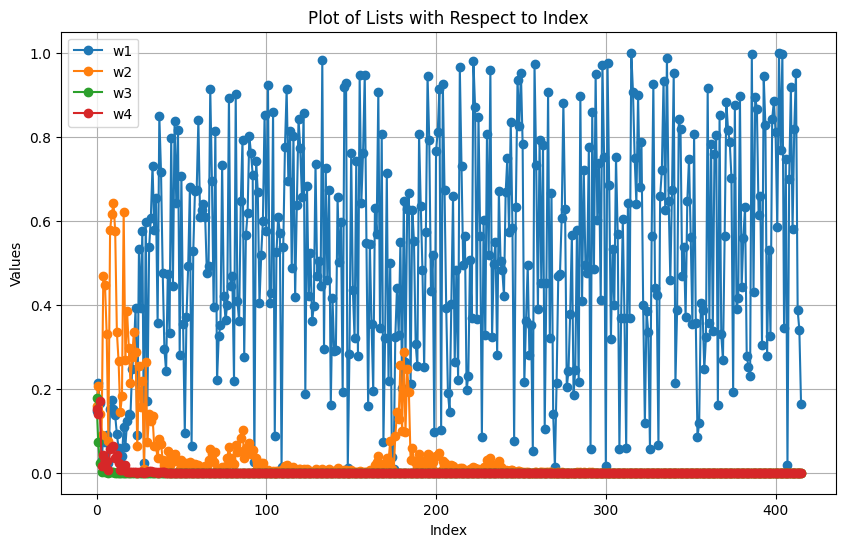

In [8]:
w1 = 0.25
w2 = 0.25
w3 = 0.25
w4 = 0.25
w1_list, w2_list, w3_list, w4_list = [], [], [], []
for i in range(len(X_test)):
  errorLinear = abs(linearPred[i] - Y_test[i])
  w1 = w1 / (2 ** (errorLinear))
  errorNeural = abs(mRegrPred[i] - Y_test[i])
  w2 = w2 / (2 ** (errorNeural))
  errorDecision = abs(decisionTreePred[i] - Y_test[i])
  w3 = w3 / (2 ** (errorDecision))
  errorRandom = abs(randomForestPred[i] - Y_test[i])
  w4 = w4 / (2 ** (errorRandom))
  w1_list.append(w1)
  w2_list.append(w2)
  w3_list.append(w3)
  w4_list.append(w4)

  sum = w1+w2+w3+w4
  w1 = w1 / sum
  w2 = w2 / sum
  w3 = w3 / sum
  w4 = w4 / sum
  print(w1,w2,w3,w4)

plt.figure(figsize=(10, 6))
plt.plot(range(len(w1_list)), w1_list, marker='o', linestyle='-', label='w1')
plt.plot(range(len(w2_list)), w2_list, marker='o', linestyle='-', label='w2')
plt.plot(range(len(w3_list)), w3_list, marker='o', linestyle='-', label='w3')
plt.plot(range(len(w4_list)), w4_list, marker='o', linestyle='-', label='w4')

# Labeling the axes
plt.xlabel('Index')
plt.ylabel('Values')

# Add a title
plt.title('Plot of Lists with Respect to Index')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()